In [1]:
import pandas as pd

df = pd.read_csv("../data/sachkonto_positionstexte.csv")
df.shape

(200, 3)

# Sachkonto-recognition from line-item texts:

In [2]:
# load data:

import pandas as pd

df = pd.read_csv("../data/sachkonto_positionstexte.csv")
X = df["Positionstext"]
S = { l[0] : l[1] for l in df[["Sachkonto", "Sachkontobeschreibung"]].drop_duplicates().values}
y = df["Sachkonto"]

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix



# encode target:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# train/test-Split:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# pipeline: TF-IDF + XGBoost :
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2))),
    ("xgb", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"))
])

# Training:
pipeline.fit(X_train, y_train)

# Prediction:
y_pred = pipeline.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Evaluation:
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))


c:\Users\Hal9\anaconda3\envs\CondaSapBSAKEnv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Classification Report:
              precision    recall  f1-score   support

      400000       1.00      0.25      0.40         4
      440000       0.00      0.00      0.00         4
      480000       0.00      0.00      0.00         4
      481000       0.14      1.00      0.25         4
      490000       0.00      0.00      0.00         4
      500000       0.25      0.25      0.25         4
      510000       0.00      0.00      0.00         4
      520000       0.00      0.00      0.00         4
      530000       0.00      0.00      0.00         4
      540000       0.00      0.00      0.00         4

    accuracy                           0.15        40
   macro avg       0.14      0.15      0.09        40
weighted avg       0.14      0.15      0.09        40

Confusion Matrix:
[[1 0 0 0 0 2 0 0 0 1]
 [0 0 0 3 0 0 0 0 0 1]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 1]
 [0 0 0 2 0 1 0 0 0 1]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 2 0 1 0 0 1 0]
 [0 0 0 2 0 0 0 

c:\Users\Hal9\anaconda3\envs\CondaSapBSAKEnv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hal9\anaconda3\envs\CondaSapBSAKEnv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hal9\anaconda3\envs\CondaSapBSAKEnv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

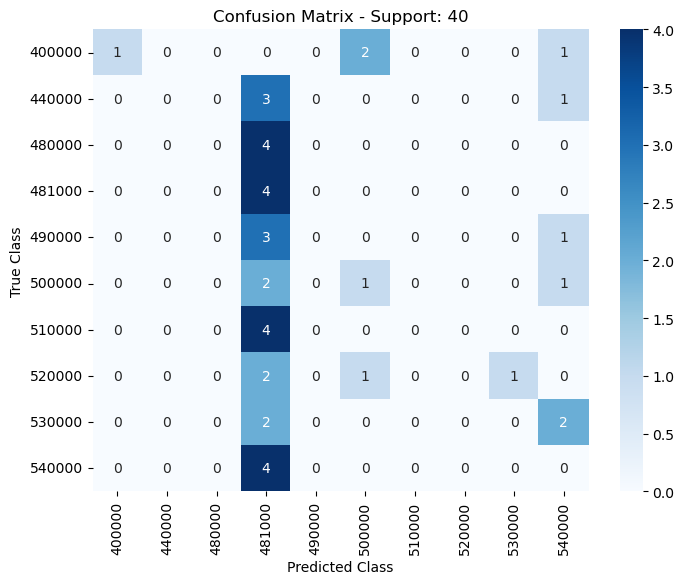

In [4]:
from utils import plot_confusion_matrix

tick_labels = y.unique()

plot_confusion_matrix(y_test=y_test, y_pred=y_pred, x_labels=tick_labels, y_labels=tick_labels)
